In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize

import cv2
import numpy as np


# Importing the dataset

In [2]:
# from pathlib import Path
# p = Path().cwd()
# q = p/"Data"

# target_dict = {'can': 0,
#                'cardboard': 1,
#                'glass bottle': 2,
#                'plastic bottle': 3} # create dictionary mapping you data classes/labels to integer labels

# images = [] # create an empty list
# labels = [] # create an empty list

In [3]:
# for fldr in q.iterdir(): 
#     current_label = fldr.name # get the name of the current label 
#     temp = q/current_label # here we are adding each if the inside folder name to the path so we can go through each of them
#     for img in temp.iterdir():
#       img = load_img(img) # load image
#       img_array = img_to_array(img) # convert the image to an NumPy array 
#       img_array_resized = smart_resize(img_array, size = (128,128)) # if necessary, resize the image to 128 by 128 
#       images.append(img_array_resized) # add image to list of images 
#       labels.append(fldr.name) # add label for this image to the list of labels 

In [4]:
# images1 = np.array(images) # convert the list of images to a NumPy array 
# labels1 = np.array(labels) # convert the list of labels to a NumPy array
# print(images1.shape)
# print(labels1.shape)

(5520, 128, 128, 3)
(5520,)


In [9]:
# # Saving the images so we don't have to loaded every time one by one
# np.save(p/"images", images1)
# np.save(p/"labels", labels1)


In [12]:
# Importing the data
images1 = np.load(p/"images.npy")
labels1 = np.load(p/"labels.npy")
print(images1.shape)
print(labels1.shape)

(5520, 128, 128, 3)
(5520,)


# Exploring the data

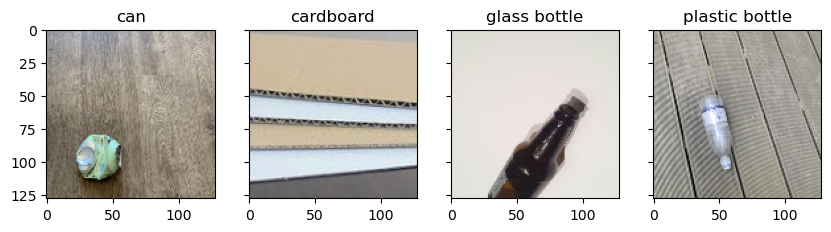

In [13]:
f, axarr = plt.subplots(1, 4, sharey=True, figsize=(10, 10))
axarr[0].set_title(labels1[1])
axarr[0].imshow(images1[20]/255)
axarr[1].set_title(labels1[2000])
axarr[1].imshow(images1[2000]/255)
axarr[2].set_title(labels1[3000])
axarr[2].imshow(images1[3000]/255)
axarr[3].set_title(labels1[5000])
axarr[3].imshow(images1[5000]/255)

In [14]:
labels_int = [target_dict.get(e, e) for e in labels1] # use the target_dict to convert the string labels to an array of integers
labels_int = np.array(labels_int) # convert the list of int labels to a NumPy array

In [44]:
unique, counts = np.unique(labels_int, return_counts=True)
dict(zip(unique, counts))

{0: 1414, 1: 1021, 2: 1448, 3: 1637}

<AxesSubplot: xlabel='Object', ylabel='count'>

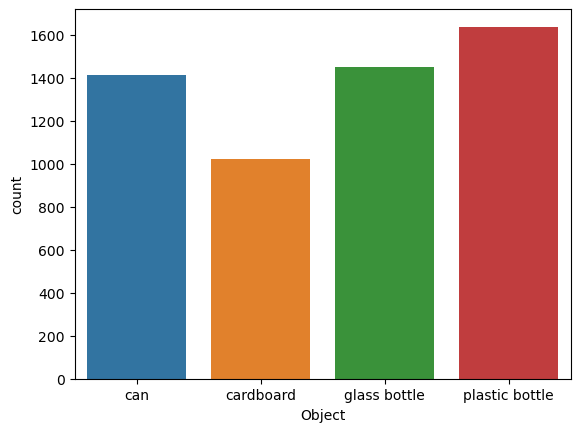

In [56]:
objects = pd.DataFrame(labels1, columns=['Object'])
sns.countplot(x=objects["Object"])

# Creating the models

In [15]:
from sklearn.model_selection import train_test_split
# 70% for training, 20% for validation, and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(images1, labels_int, test_size=0.1, random_state=42)

In [16]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [17]:
# Normalizing the data and reshaping
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
# Shape of the training dataset
X_train.shape

(4968, 128, 128, 3)

In [19]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, MaxPool2D 
from tensorflow.keras import optimizers
from tensorflow.keras import losses

y_train = to_categorical(y_train, dtype="int")
y_test = to_categorical(y_test, dtype="int")

In [20]:
image_shape = X_train[0].shape
image_shape

(128, 128, 3)

In [21]:
# Creating a baseline model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, 2, 2, padding = 'same', input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (3, 3)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(4, activation = 'softmax'))

In [22]:
cnn_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 14112)             0         
                                                                 
 dense (Dense)               (None, 32)                451616    
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 452,164
Trainable params: 452,164
Non-trainable params: 0
__________________________________________________

In [24]:
import time

start_time = time.time()

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=128,
                        epochs=10,
                        verbose=1,
                        validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
32/32 [==============================] - 3s 76ms/step - loss: 1.5708 - accuracy: 0.3387 - val_loss: 1.9800 - val_accuracy: 0.2364
Epoch 2/10
32/32 [==============================] - 3s 81ms/step - loss: 1.1935 - accuracy: 0.4914 - val_loss: 1.4638 - val_accuracy: 0.3662
Epoch 3/10
32/32 [==============================] - 3s 86ms/step - loss: 1.1053 - accuracy: 0.5340 - val_loss: 1.4349 - val_accuracy: 0.4064
Epoch 4/10
32/32 [==============================] - 3s 95ms/step - loss: 1.0323 - accuracy: 0.5614 - val_loss: 0.9734 - val_accuracy: 0.5845
Epoch 5/10
32/32 [==============================] - 3s 99ms/step - loss: 0.9644 - accuracy: 0.5918 - val_loss: 1.2165 - val_accuracy: 0.4517
Epoch 6/10
32/32 [==============================] - 3s 91ms/step - loss: 0.9252 - accuracy: 0.6175 - val_loss: 1.0099 - val_accuracy: 0.5674
Epoch 7/10
32/32 [==============================] - 3s 93ms/step - loss: 0.8682 - accuracy: 0.6442 - val_loss: 1.3540 - val_accuracy: 0.3913
Epoch 8/10
32

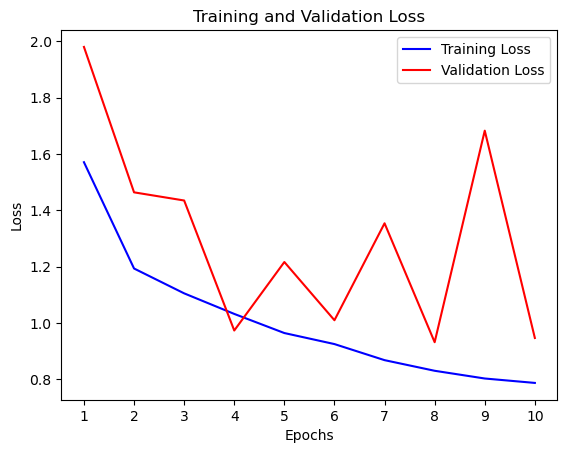

In [25]:
history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

## Second Model

In [26]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=image_shape))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
 
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation='softmax'))

In [27]:
# Explore the structure of the NN
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        36928     
                                                      

In [29]:
model2.compile(loss ='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.001),
              metrics =['accuracy'])

In [30]:
start_time = time.time()

history1 = model2.fit(X_train, y_train,
                      batch_size=128,
                      epochs=10,
                      verbose=1,
                      validation_split=0.2)

elapsed_time = time.time() - start_time

print(elapsed_time)

Epoch 1/10
32/32 [==============================] - 121s 4s/step - loss: 1.4032 - accuracy: 0.2728 - val_loss: 1.2909 - val_accuracy: 0.3260
Epoch 2/10
32/32 [==============================] - 177s 6s/step - loss: 1.2008 - accuracy: 0.4469 - val_loss: 1.0873 - val_accuracy: 0.5332
Epoch 3/10
32/32 [==============================] - 159s 5s/step - loss: 1.0286 - accuracy: 0.5425 - val_loss: 0.9203 - val_accuracy: 0.6177
Epoch 4/10
32/32 [==============================] - 181s 6s/step - loss: 0.9568 - accuracy: 0.5828 - val_loss: 0.8931 - val_accuracy: 0.6137
Epoch 5/10
32/32 [==============================] - 182s 6s/step - loss: 0.8322 - accuracy: 0.6583 - val_loss: 0.9822 - val_accuracy: 0.6197
Epoch 6/10
32/32 [==============================] - 162s 5s/step - loss: 0.7548 - accuracy: 0.6933 - val_loss: 1.1775 - val_accuracy: 0.5704
Epoch 7/10
32/32 [==============================] - 208s 7s/step - loss: 0.8058 - accuracy: 0.6915 - val_loss: 0.9304 - val_accuracy: 0.6640
Epoch 8/10
32

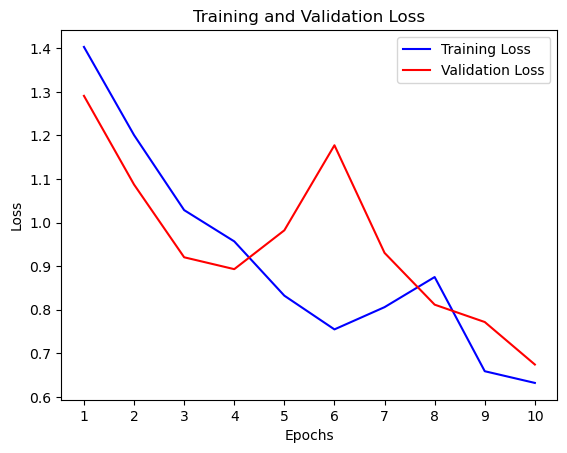

In [31]:
history_dict = history1.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

# Exploring model errors

18/18 [==============================] - 2s 114ms/step


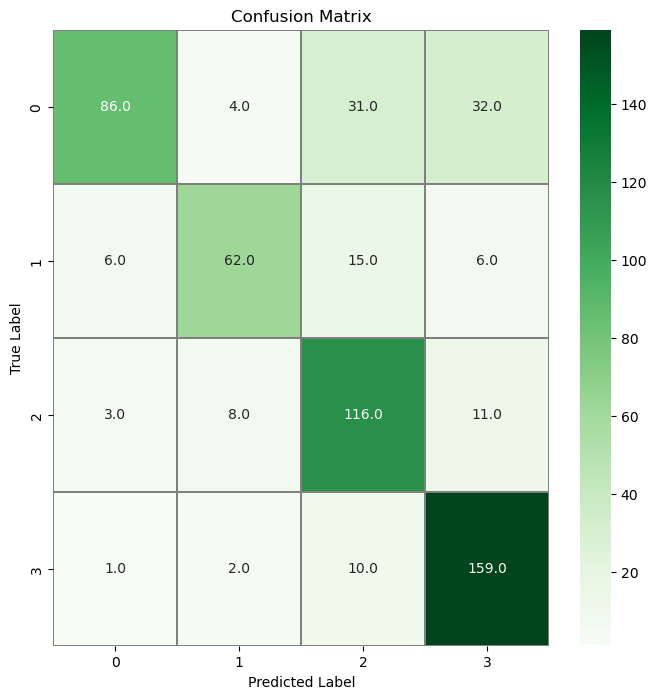

In [35]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
y_pred = model2.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 29ms/step


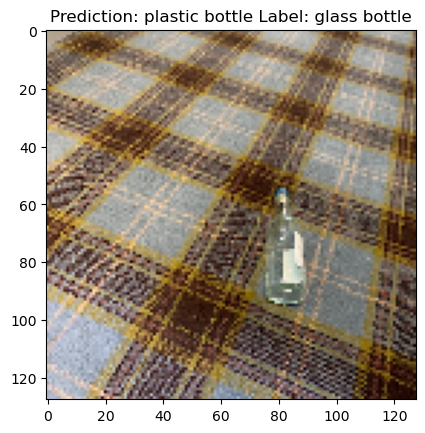

1/1 [==============================] - 0s 29ms/step


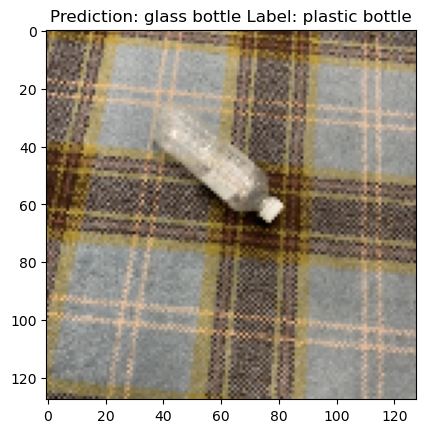

1/1 [==============================] - 0s 29ms/step


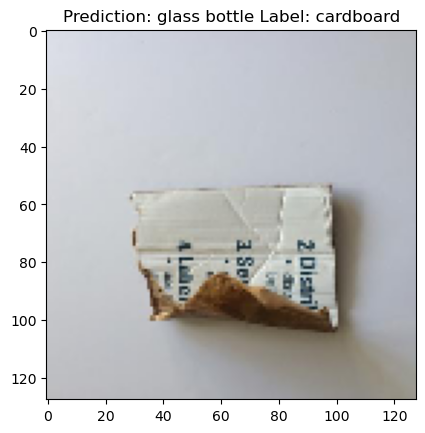

1/1 [==============================] - 0s 23ms/step


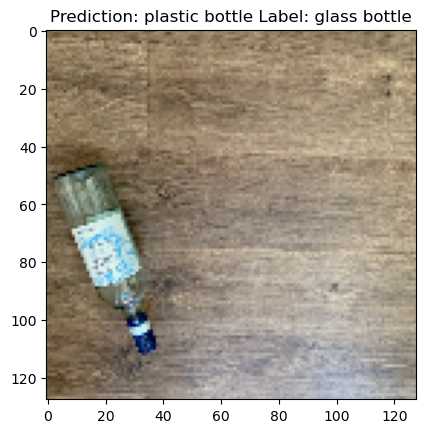

1/1 [==============================] - 0s 25ms/step


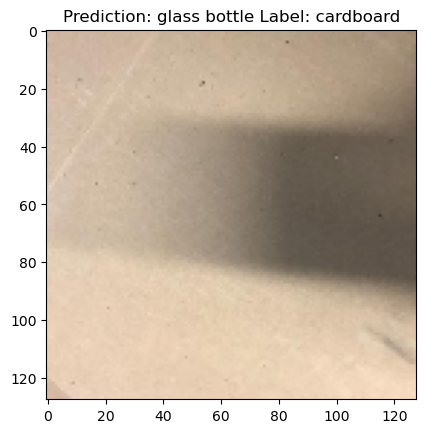

1/1 [==============================] - 0s 23ms/step


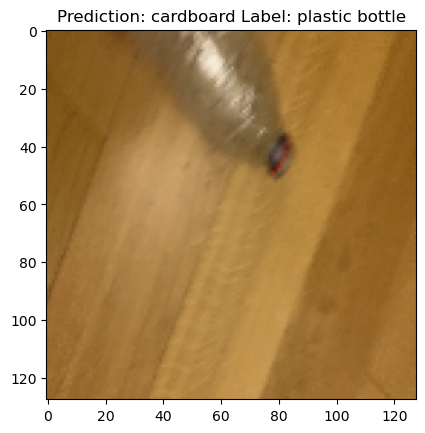

1/1 [==============================] - 0s 33ms/step


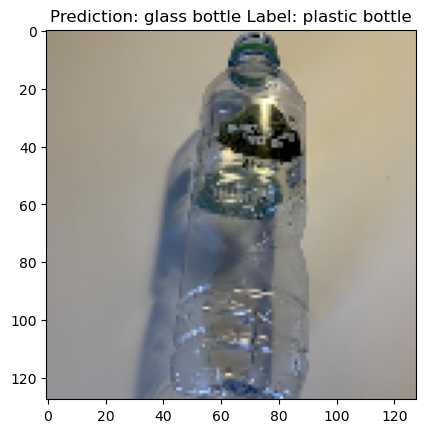

1/1 [==============================] - 0s 29ms/step


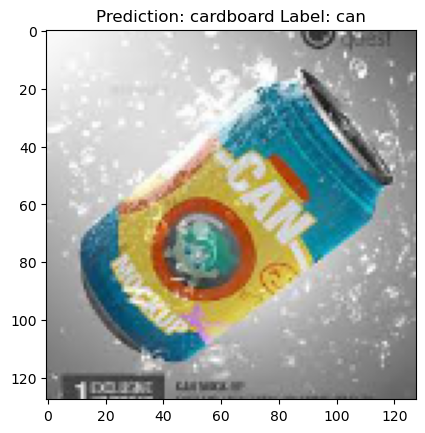

1/1 [==============================] - 0s 33ms/step


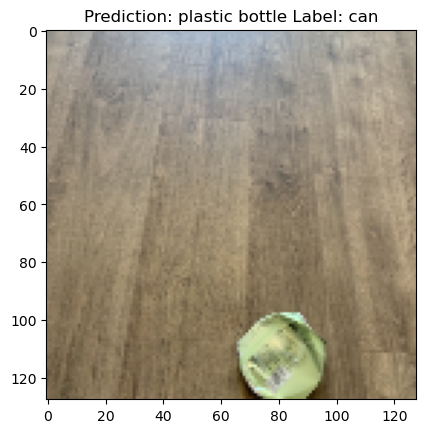

1/1 [==============================] - 0s 31ms/step


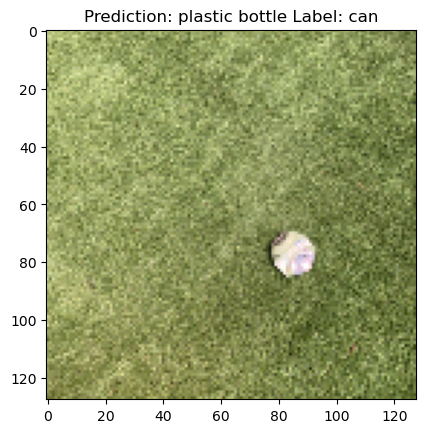

1/1 [==============================] - 0s 37ms/step


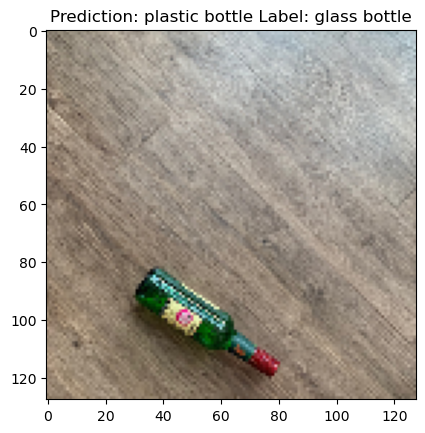

1/1 [==============================] - 0s 28ms/step


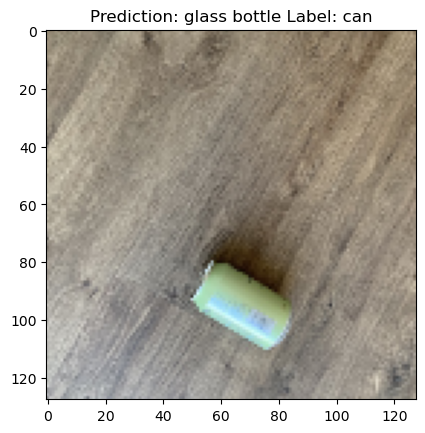

1/1 [==============================] - 0s 26ms/step


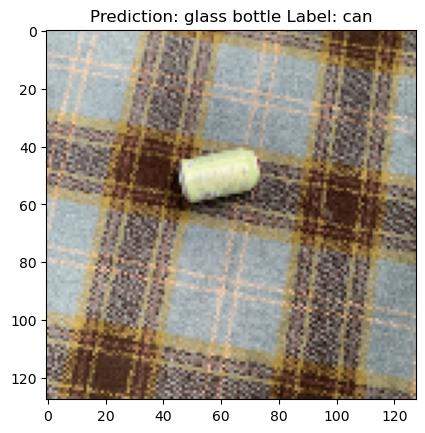

1/1 [==============================] - 0s 49ms/step


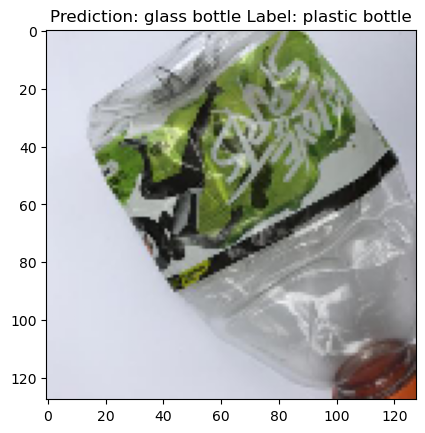

1/1 [==============================] - 0s 31ms/step


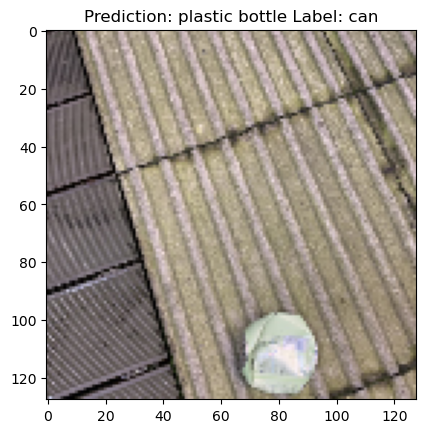

1/1 [==============================] - 0s 25ms/step


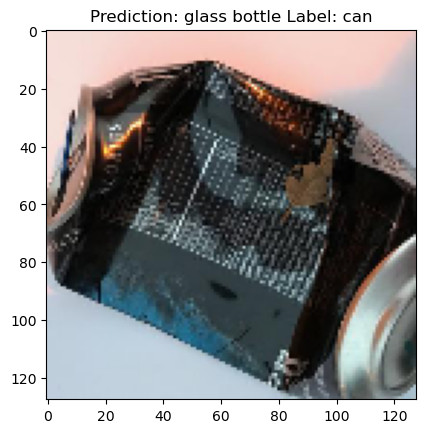

1/1 [==============================] - 0s 29ms/step


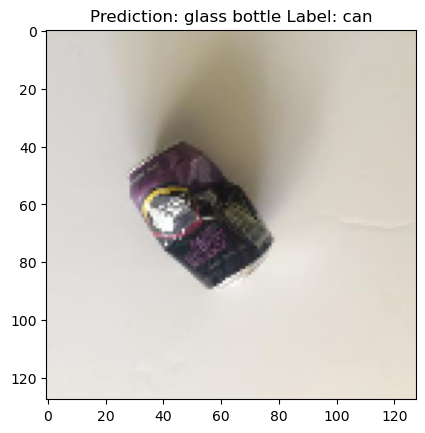

1/1 [==============================] - 0s 26ms/step


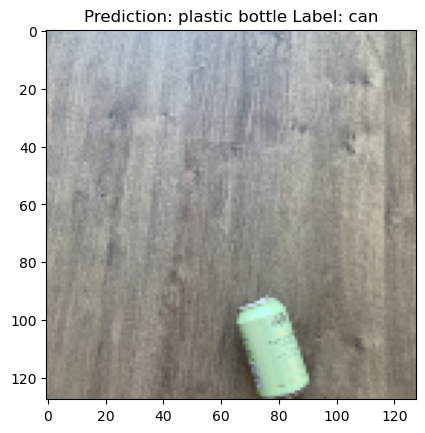

1/1 [==============================] - 0s 37ms/step


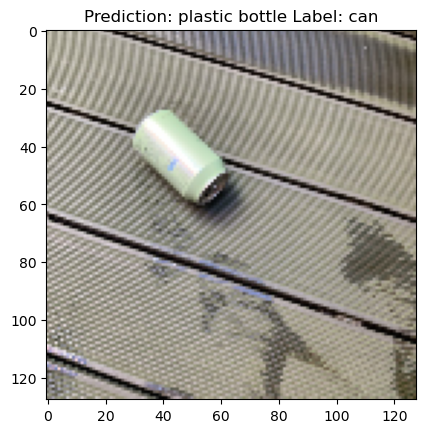

1/1 [==============================] - 0s 36ms/step


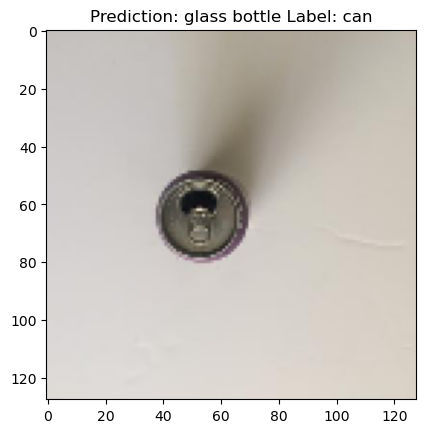

1/1 [==============================] - 0s 27ms/step


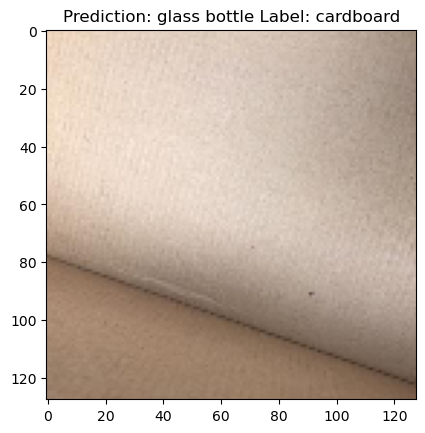

1/1 [==============================] - 0s 19ms/step


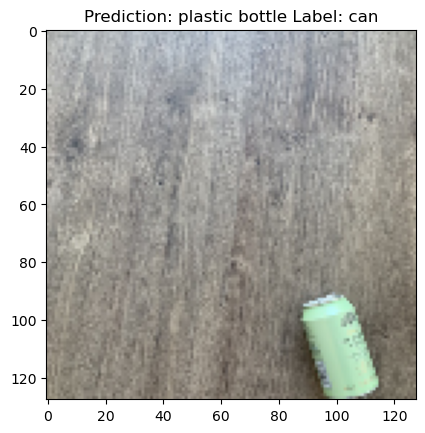

1/1 [==============================] - 0s 31ms/step


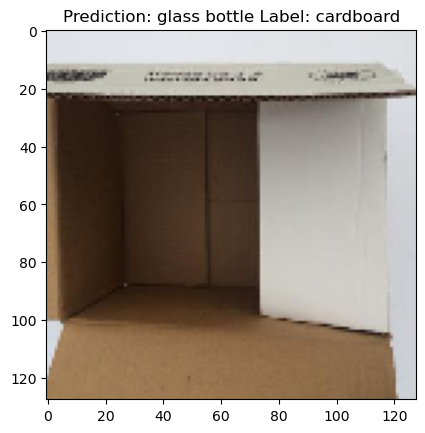

1/1 [==============================] - 0s 24ms/step


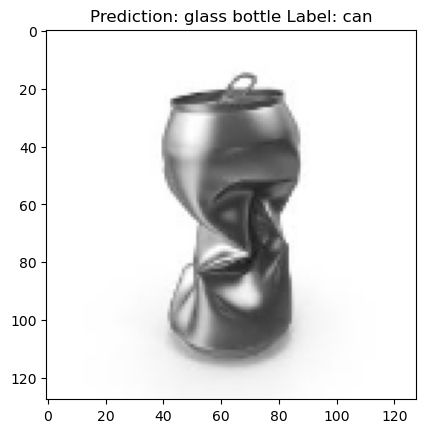

1/1 [==============================] - 0s 29ms/step


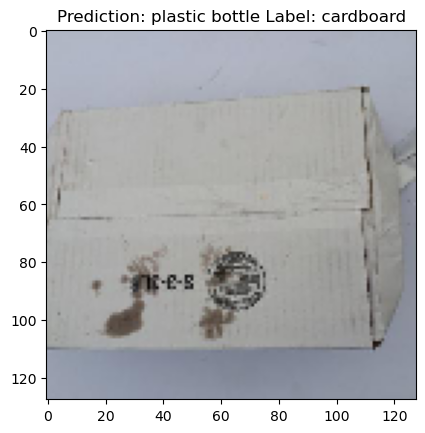

1/1 [==============================] - 0s 28ms/step


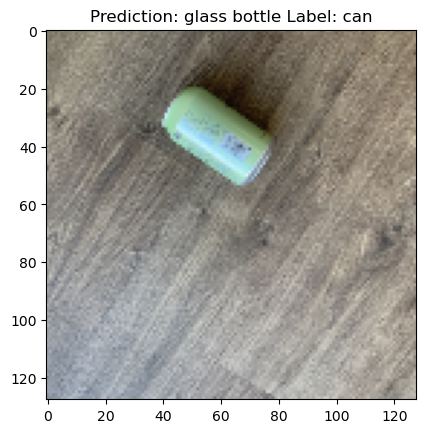

1/1 [==============================] - 0s 24ms/step


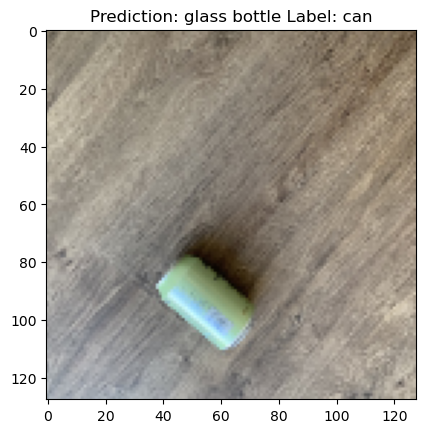

1/1 [==============================] - 0s 25ms/step


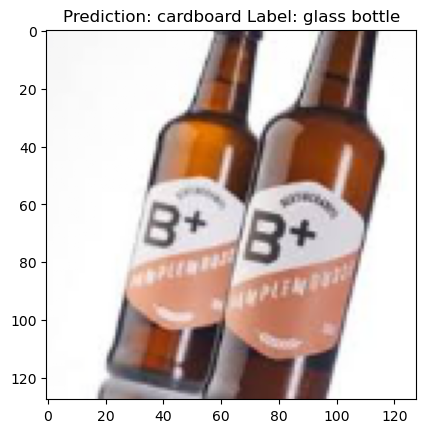

1/1 [==============================] - 0s 22ms/step


In [58]:
class_names = ['can', 'cardboard', 'glass bottle', 'plastic bottle']

for x in range(100):
    test_image = X_test[x,:]
    predicted_cat = model2.predict(np.array([test_image])).argmax()
    label = y_test[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %s Label: %s' % (class_names[predicted_cat], class_names[label]))
        plt.imshow(test_image)
        plt.show()